## ANCOVA ANALYSIS
### Ptosis Study

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import gaussian_kde
import scipy.stats as stats

# read in dataset and get column names
df = pd.read_csv('NEW.csv')
df.head()
df.columns

Index(['Dataset', 'Patient_name', '#', 'Surgery type on SX date',
       'MMCR (0), ELR (1)', 'Gender (Male = 1, Female = 2)', 'Age',
       'Eye (OD=0, OS=1)', 'Surgical eye (yes=1, no =0)',
       'Tissue Resected (mm)', 'Tarsus resected (Yes/No)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus', 'Other surgeries at the same time', 'OD/OS',
       'Sx Date'],
      dtype='object')

In [6]:
# group by patients who had and did not have tarsus resected and find the respective mean pre-op MRD1 values of those groups
df.groupby('Tarsus resected (Yes/No)')['Preop_MRD1'].mean()

Tarsus resected (Yes/No)
0    1.133333
N    1.572238
Y    0.469154
Name: Preop_MRD1, dtype: float64

Labeling

In [7]:
# label Y and N values as 1 and 0 for the purpose of running the models
df['Tarsus_resected'] = df['Tarsus resected (Yes/No)'].map({'Y': 1, 'N': 0})
df['Other_surgeries_factor'] = df['Other surgeries at the same time'].astype('category')

Group by Tarsectomy

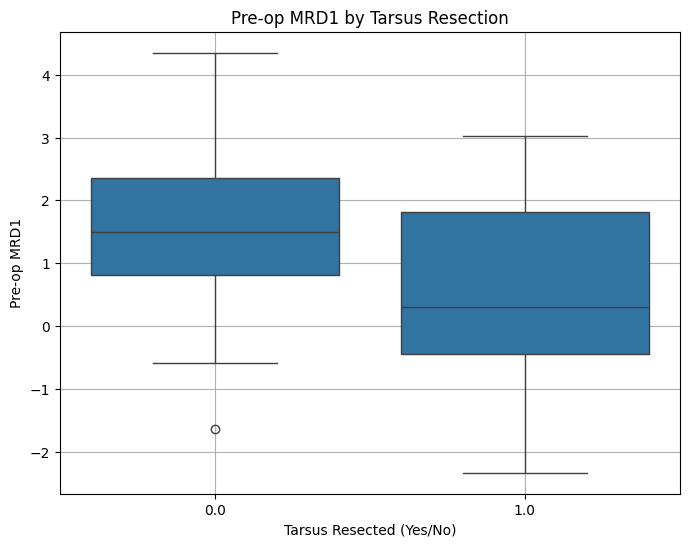

In [13]:
# box plot of Pre-op MRD1 values for patients who had and did not have tarsus resection
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tarsus_resected', y='Preop_MRD1', data=df)
plt.title('Pre-op MRD1 by Tarsus Resection')
plt.xlabel('Tarsus Resected (Yes/No)')
plt.ylabel('Pre-op MRD1')
plt.grid(True)
plt.show()

In [9]:
# assign pre-op MRD1 values for those who have and do not have tarsus resected
group1 = df[df['Tarsus_resected'] == 1]['Preop_MRD1']
group0 = df[df['Tarsus_resected'] == 0]['Preop_MRD1']

# conduct a 2 sample independent t test to compare the means of the two groups
t_stat, p_val = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

T-statistic: -3.519, p-value: 0.001


From the t test above, we see that the p-value is 0.001 < the significance value of 0.05. This shows that the difference between the pre-op MRD1 values of patients who did and did not have their tarsus resected are statistically signifcantly different. This makes sense as we would expect different pre-op MRD1 values for those who do and do not need to have their tarsus restected.

In [ ]:
# summary statistics of post-op MRD1 those who did and did not have their tarsus resected
df[['Tarsus_resected', 'Most recent Post Op MRD1']].groupby('Tarsus_resected').describe()

Most recent Post Op MRD1                                     \
                                   count      mean       std    min     25%   
Tarsus_resected                                                               
0.0                                130.0  2.836462  1.127169  0.360  2.1075   
1.0                                 26.0  2.880731  1.156954  0.659  2.2730   

                                     
                   50%    75%   max  
Tarsus_resected                      
0.0              2.780  3.525  6.35  
1.0              2.945  3.531  4.79

In [ ]:
# assign post-op MRD1 values for those who have and do not have tarsus resected
group1 = df[df['Tarsus_resected'] == 1]['Most recent Post Op MRD1']
group0 = df[df['Tarsus_resected'] == 0]['Most recent Post Op MRD1']

# conduct a 2 sample independent t test to compare the means of the two groups
t_stat, p_val = ttest_ind(group1.dropna(), group0.dropna(), equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

T-statistic: 0.179, p-value: 0.859


From the t test above, we see that the p-value is 0.859 > the significance value of 0.05. This shows that the difference between the post-op MRD1 values of patients who did and did not have their tarsus resected are NOT statistically signifcantly different.

OLS

In [ ]:
# ordinary least squares regression
ols_model = smf.ols('Q("Most recent Post Op MRD1") ~ Tarsus_resected', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Most recent Post Op MRD1")   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                 -0.006
Method:                            Least Squares   F-statistic:                   0.03313
Date:                           Sun, 01 Jun 2025   Prob (F-statistic):              0.856
Time:                                   12:00:59   Log-Likelihood:                -239.70
No. Observations:                            156   AIC:                             483.4
Df Residuals:                                154   BIC:                             489.5
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8365      0.099     28.568      0.000       2.640       3.033
Tarsus_resected     0.0443      0.243      0.182      0.856      -0.436       0.525
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.477
Skew:                           0.132   Prob(JB):                        0.788
Kurtosis:                       3.062   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualizations

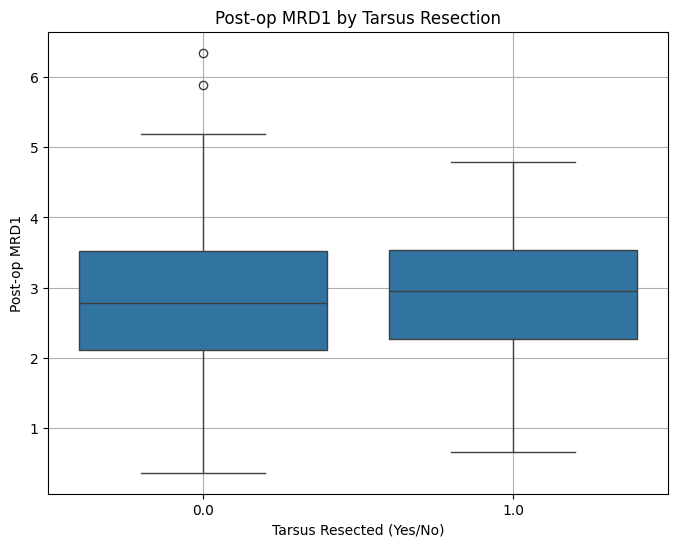

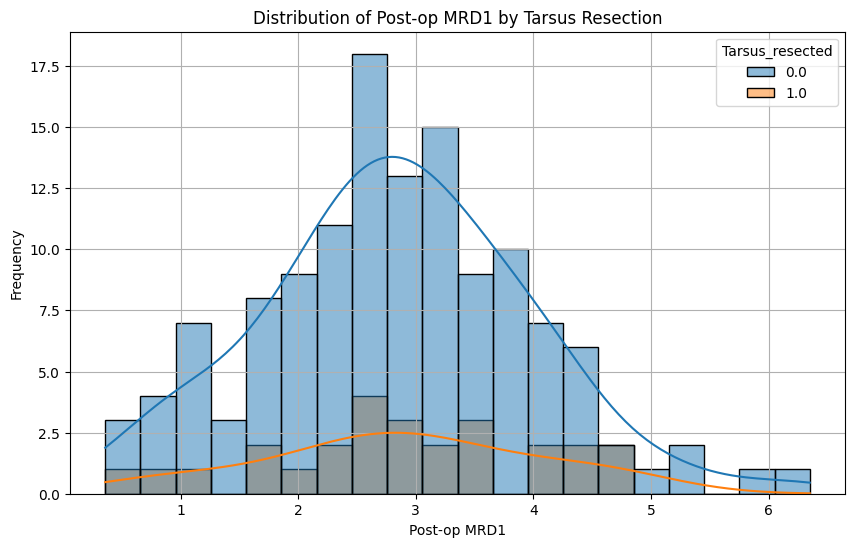

In [ ]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tarsus_resected', y='Most recent Post Op MRD1', data=df)
plt.title('Post-op MRD1 by Tarsus Resection')
plt.xlabel('Tarsus Resected (Yes/No)')
plt.ylabel('Post-op MRD1')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Most recent Post Op MRD1', hue='Tarsus_resected', bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Post-op MRD1 by Tarsus Resection')
plt.xlabel('Post-op MRD1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Introduce Pre-op MRD1 as a predictor to control for its effects
ANCOVA

In [ ]:
df = df.dropna(subset=['Preop_MRD1', 'Most recent Post Op MRD1', 'Tarsus_resected']) # drop NA values for the listed columns

# perform ordinary least squares regression with the post-op MRD1 values as the outcome and the pre-op MRD1 and tarsus resected variables as predictors
model = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1") * Tarsus_resected',
    data=df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Most recent Post Op MRD1")   R-squared:                       0.218
Model:                                       OLS   Adj. R-squared:                  0.202
Method:                            Least Squares   F-statistic:                     14.12
Date:                           Sun, 01 Jun 2025   Prob (F-statistic):           3.63e-08
Time:                                   12:01:00   Log-Likelihood:                -220.54
No. Observations:                            156   AIC:                             449.1
Df Residuals:                                152   BIC:                             461.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.0867      0.159     13.120      0.000       1.772       2.401
Q("Preop_MRD1")                     0.4769      0.084      5.671      0.000       0.311       0.643
Tarsus_resected                     0.5967      0.261      2.285      0.024       0.081       1.113
Q("Preop_MRD1"):Tarsus_resected    -0.0563      0.156     -0.360      0.720      -0.365       0.253
==============================================================================
Omnibus:                        3.367   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.026
Skew:                           0.337   Prob(JB):                        0.220
Kurtosis:                       3.112   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 800x600 with 0 Axes>

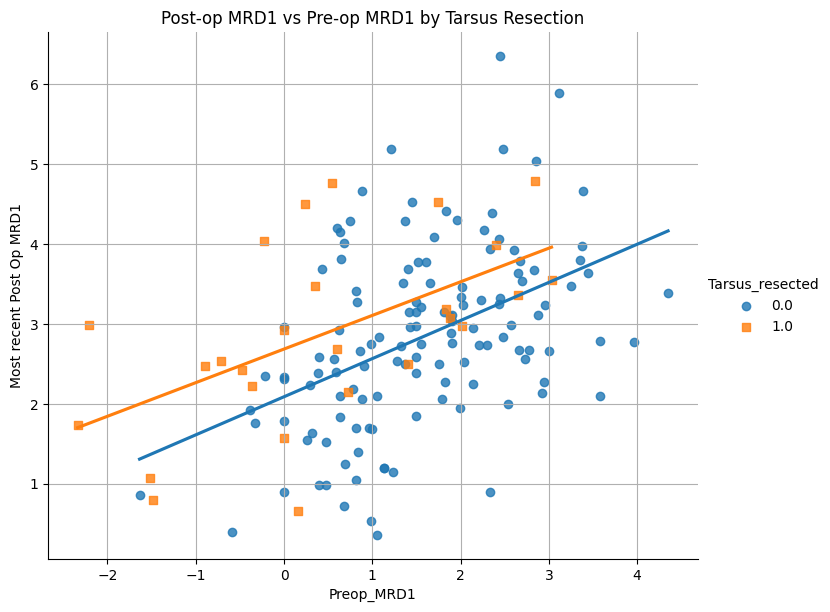

In [ ]:
# Plot pre-op vs post-op MRD1 with separate regression lines by tarsus group
plt.figure(figsize=(8, 6))
sns.lmplot(
    data=df,
    x='Preop_MRD1', 
    y='Most recent Post Op MRD1', 
    hue='Tarsus_resected', 
    height=6, 
    aspect=1.2,
    markers=['o', 's'],
    ci = None
)
plt.title('Post-op MRD1 vs Pre-op MRD1 by Tarsus Resection')
plt.grid(True)
plt.show()

In [ ]:
# perform ordinary least squares regression with the post-op MRD1 values as the outcome and the pre-op MRD1 and tarsus resected variables as predictors
# WITHOUT INTERACTION EFFECTS
model = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1") + Tarsus_resected',
    data=df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Most recent Post Op MRD1")   R-squared:                       0.217
Model:                                       OLS   Adj. R-squared:                  0.207
Method:                            Least Squares   F-statistic:                     21.23
Date:                           Sun, 01 Jun 2025   Prob (F-statistic):           7.27e-09
Time:                                   12:01:00   Log-Likelihood:                -220.61
No. Observations:                            156   AIC:                             447.2
Df Residuals:                                153   BIC:                             456.4
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1122      0.142     14.887      0.000       1.832       2.393
Q("Preop_MRD1")     0.4606      0.071      6.514      0.000       0.321       0.600
Tarsus_resected     0.5524      0.230      2.406      0.017       0.099       1.006
==============================================================================
Omnibus:                        3.487   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.143
Skew:                           0.343   Prob(JB):                        0.208
Kurtosis:                       3.116   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Step 1: Fit the model
model = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1") + Tarsus_resected',
    data=df
).fit()

# Step 2: Get the mean value of Preop_MRD1 (the covariate)
mean_preop = df['Preop_MRD1'].mean()

# Step 3: Create a DataFrame with both groups and the same covariate value
adjust_df = pd.DataFrame({
    'Preop_MRD1': [mean_preop, mean_preop],
    'Tarsus_resected': [0, 1]
})

# Step 4: Predict adjusted means
adjusted_means = model.predict(adjust_df)

# Step 5: Display results
adjust_df['Adjusted_PostOp_MRD1'] = adjusted_means
adjust_df['Tarsectomy'] = adjust_df['Tarsus_resected'].map({0: 'No', 1: 'Yes'})
print(adjust_df[['Tarsectomy', 'Adjusted_PostOp_MRD1']])

3.301951 - 2.749557

  Tarsectomy  Adjusted_PostOp_MRD1
0         No              2.749557
1        Yes              3.301951


0.552394

/var/folders/k9/972x7z8s0zz_56m_1xxv33s00000gn/T/ipykernel_10861/1610874509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'resid_postop'] = model.resid  # residuals = what’s not explained by the model


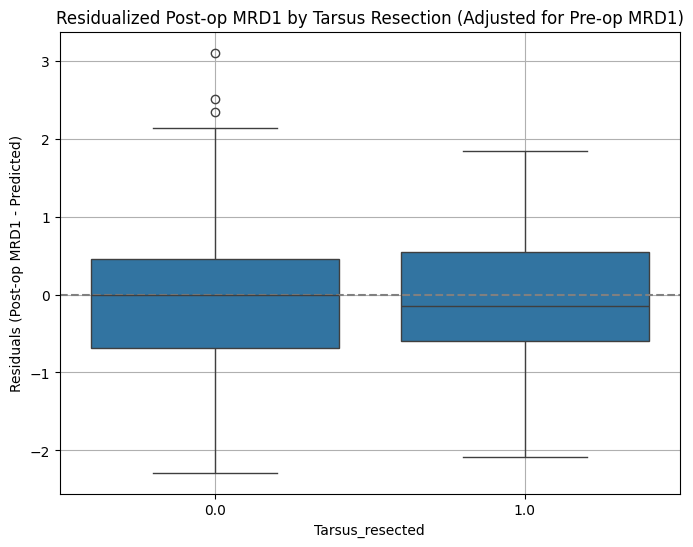

In [ ]:
# Create adjusted values: remove influence of pre-op MRD1
df.loc[:, 'resid_postop'] = model.resid  # residuals = what’s not explained by the model

# Plot adjusted MRD1 by group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tarsus_resected', y='resid_postop', data=df)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residualized Post-op MRD1 by Tarsus Resection (Adjusted for Pre-op MRD1)')
plt.ylabel('Residuals (Post-op MRD1 - Predicted)')
plt.grid(True)
plt.show()

In [ ]:
# t test for the residuals of post-op MRD1 values of those who did and did not have tarsus resected
resid_yes = df[df['Tarsus_resected'] == 1]['resid_postop']
resid_no = df[df['Tarsus_resected'] == 0]['resid_postop']

t_stat, p_val = ttest_ind(resid_yes, resid_no, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

T-statistic: 0.000, p-value: 1.000


From the output above, the p-value of 1.000 > the significance value of 0.05. This is good since it shows that the residual values are similar, meaning that the model captured the group differences well. 

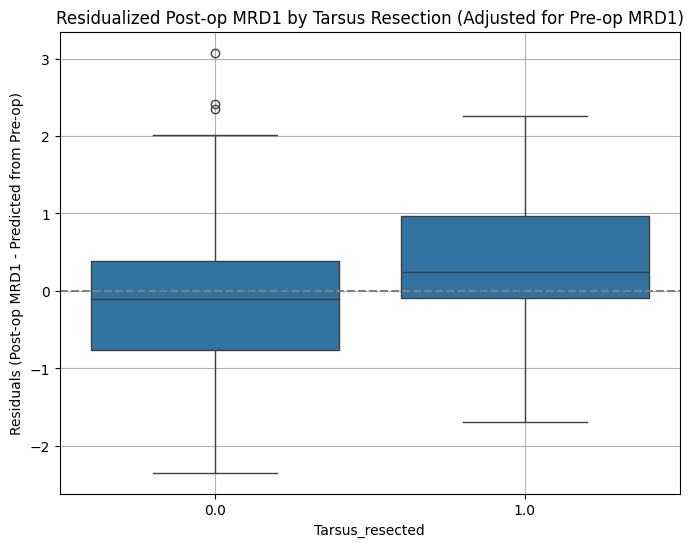

T-statistic: 2.342, p-value: 0.025


In [ ]:
# Step 1: Fit model with only Pre-op MRD1
model_preop_only = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1")',
    data=df
).fit()

# Step 2: Get residuals = adjusted post-op values (remove pre-op influence)
df.loc[:, 'resid_postop'] = model_preop_only.resid

# Step 3: Plot residuals by Tarsus group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tarsus_resected', y='resid_postop', data=df)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residualized Post-op MRD1 by Tarsus Resection (Adjusted for Pre-op MRD1)')
plt.ylabel('Residuals (Post-op MRD1 - Predicted from Pre-op)')
plt.grid(True)
plt.show()

# Step 4: Statistically test for difference
from scipy.stats import ttest_ind

group1 = df[df['Tarsus_resected'] == 1]['resid_postop'].dropna()
group0 = df[df['Tarsus_resected'] == 0]['resid_postop'].dropna()
t_stat, p_val = ttest_ind(group1, group0, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

/var/folders/k9/972x7z8s0zz_56m_1xxv33s00000gn/T/ipykernel_10861/1359542601.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fitted_postop'] = model.fittedvalues
/var/folders/k9/972x7z8s0zz_56m_1xxv33s00000gn/T/ipykernel_10861/1359542601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tarsus_group'] = df['Tarsus_resected'].map({1: 'Tarsectomy', 0: 'No Tarsectomy'})


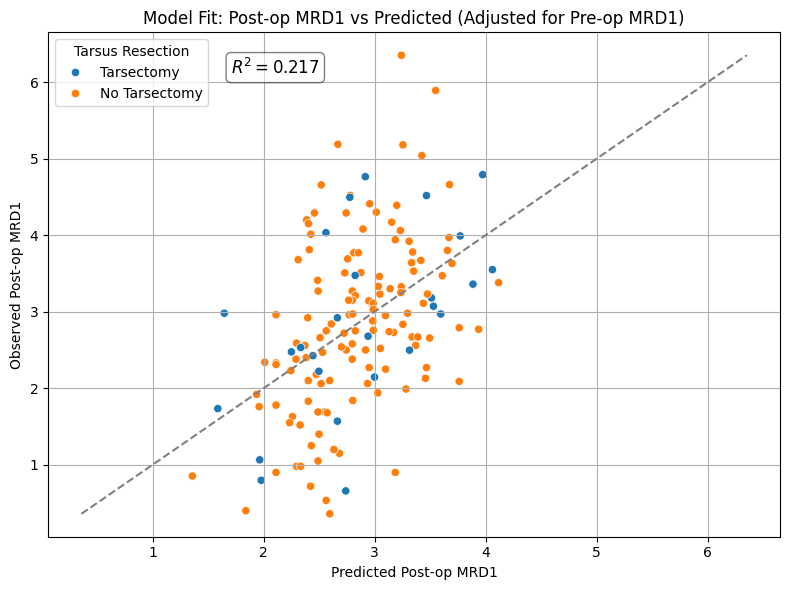

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# Fit the model predicting Post-op MRD1
model = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1") + Tarsus_resected',
    data=df
).fit()

# Add predicted values to the DataFrame
df['fitted_postop'] = model.fittedvalues
df['Tarsus_group'] = df['Tarsus_resected'].map({1: 'Tarsectomy', 0: 'No Tarsectomy'})

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fitted_postop', y='Most recent Post Op MRD1', hue='Tarsus_group', data=df)

# Add 1:1 reference line
min_val = min(df['fitted_postop'].min(), df['Most recent Post Op MRD1'].min())
max_val = max(df['fitted_postop'].max(), df['Most recent Post Op MRD1'].max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray')

# Annotate R^2
r_squared = model.rsquared
plt.text(0.25, 0.95, f'$R^2 = {r_squared:.3f}$', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

# Plot labels and layout
plt.xlabel('Predicted Post-op MRD1')
plt.ylabel('Observed Post-op MRD1')
plt.title('Model Fit: Post-op MRD1 vs Predicted (Adjusted for Pre-op MRD1)')
plt.grid(True)
plt.legend(title='Tarsus Resection')
plt.tight_layout()
plt.show()

In [15]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Define columns to exclude from correlation check
exclude_cols = ['Most recent Post Op MRD1', 'Change in MRD (post-pre)', 'Preop_MRD1']

# Step 3: Drop excluded columns
predictors = numeric_df.drop(columns=exclude_cols, errors='ignore')

# Step 4: Compute Pearson correlation with the outcome
correlations = predictors.corrwith(df['Most recent Post Op MRD1'])

# Step 5: Sort by absolute correlation strength
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Show result
print(correlations_sorted)

Length of follow up (mo)                                         -0.139203
Eye (OD=0, OS=1)                                                 -0.128532
#                                                                -0.115561
Age                                                              -0.108699
Gender (Male = 1, Female = 2)                                     0.092586
Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)    0.039853
Tissue Resected (mm)                                             -0.031626
Tarsus_resected                                                   0.014666
MMCR (0), ELR (1)                                                      NaN
Surgical eye (yes=1, no =0)                                            NaN
Both eyes tarsus                                                       NaN
Other surgeries at the same time                                       NaN
dtype: float64


/Users/chinmayvarshneya/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/chinmayvarshneya/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


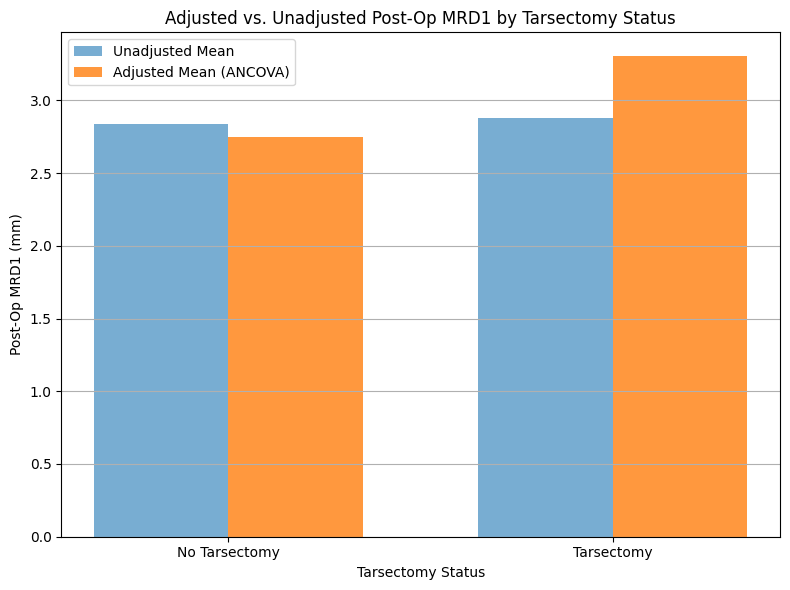

           Group  Unadjusted_PostOp_MRD1  Adjusted_PostOp_MRD1
0  No Tarsectomy                2.836462              2.749557
1     Tarsectomy                2.880731              3.301951


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# Fit the ANCOVA model
model = smf.ols(
    'Q("Most recent Post Op MRD1") ~ Q("Preop_MRD1") + Tarsus_resected',
    data=df
).fit()

# Step 1: Calculate adjusted means (hold Preop_MRD1 constant at its mean)
mean_preop = df['Preop_MRD1'].mean()
adjust_df = pd.DataFrame({
    'Preop_MRD1': [mean_preop, mean_preop],
    'Tarsus_resected': [0, 1]
})
adjust_df['Adjusted_PostOp_MRD1'] = model.predict(adjust_df)
adjust_df['Group'] = ['No Tarsectomy', 'Tarsectomy']

# Step 2: Calculate unadjusted (raw) group means
unadjusted_means = df.groupby('Tarsus_resected')['Most recent Post Op MRD1'].mean().reset_index()
unadjusted_means['Group'] = unadjusted_means['Tarsus_resected'].map({0: 'No Tarsectomy', 1: 'Tarsectomy'})
unadjusted_means.rename(columns={'Most recent Post Op MRD1': 'Unadjusted_PostOp_MRD1'}, inplace=True)

# Step 3: Merge and prepare for plotting
plot_df = adjust_df.merge(unadjusted_means[['Group', 'Unadjusted_PostOp_MRD1']], on='Group')

# Step 4: Plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(plot_df))

plt.bar(index, plot_df['Unadjusted_PostOp_MRD1'], bar_width, label='Unadjusted Mean', alpha=0.6)
plt.bar(index + bar_width, plot_df['Adjusted_PostOp_MRD1'], bar_width, label='Adjusted Mean (ANCOVA)', alpha=0.8)

plt.xlabel('Tarsectomy Status')
plt.ylabel('Post-Op MRD1 (mm)')
plt.title('Adjusted vs. Unadjusted Post-Op MRD1 by Tarsectomy Status')
plt.xticks(index + bar_width / 2, plot_df['Group'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: print the means table
print(plot_df[['Group', 'Unadjusted_PostOp_MRD1', 'Adjusted_PostOp_MRD1']])

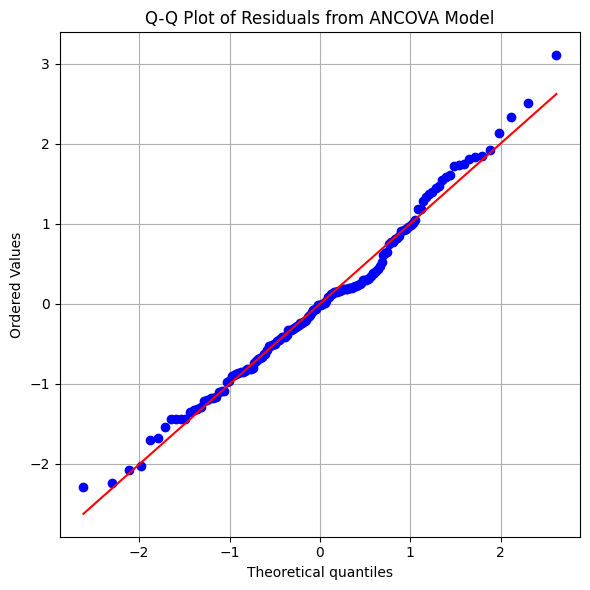

In [26]:
# Extract residuals
residuals = model.resid

# Plot Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals from ANCOVA Model")
plt.grid(True)
plt.tight_layout()
plt.show()

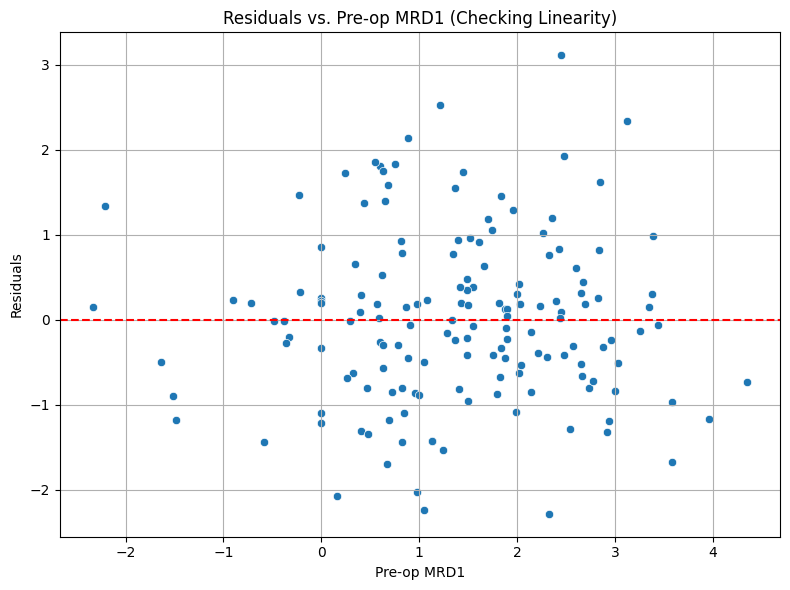

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get residuals and covariate
residuals = model.resid
preop = df['Preop_MRD1']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=preop, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Pre-op MRD1')
plt.ylabel('Residuals')
plt.title('Residuals vs. Pre-op MRD1 (Checking Linearity)')
plt.grid(True)
plt.tight_layout()
plt.show()